In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import random
import scipy.stats as st
import pycountry

from scipy.stats import linregress
from sklearn import datasets, linear_model
from citipy import citipy


#Output Folder Path
path = "output_data/"

#Read_csv_Path
players_by_country_path = f"{path}player_stats_2022_country_clean.csv"
players_by_college_path = f"{path}player_stats_2022_college_clean.csv"
players_by_uscity_path = f"{path}player_stats_2022_uscity_clean.csv"
players_by_intcity_path = f"{path}player_stats_2022_intcity_clean.csv"


ModuleNotFoundError: No module named 'pycountry'

In [41]:
players_by_country = pd.read_csv(players_by_country_path)
players_by_college = pd.read_csv(players_by_college_path)
players_by_uscity = pd.read_csv(players_by_uscity_path)
players_by_intcity = pd.read_csv(players_by_intcity_path)

## Country

There are 39 countries where most players in the NBA that where not born in the US come from
The top 10  are shown here:


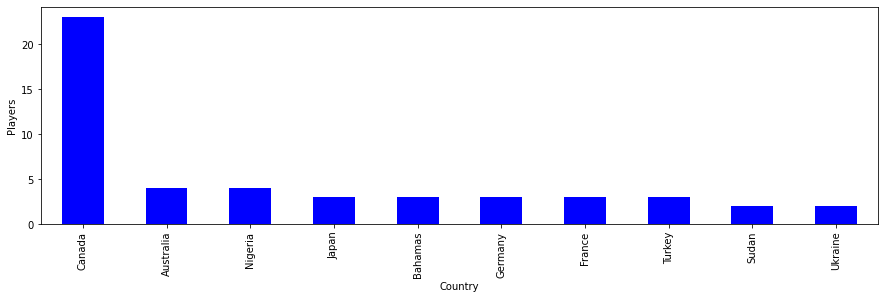

In [52]:
players_by_country_clean = players_by_country.loc[players_by_country['Country'] != 'US']

n = 10
countries_data = players_by_country_clean['Country'].value_counts()[:n].index.tolist()
players = players_by_country_clean['Country'].value_counts()[:n].values.tolist()

countries = []

for each, country in enumerate(countries_data):
    country_conv = pycountry.countries.lookup(countries_data[each])
    countries.append(country_conv.name)
    
    
countries_data = {'Country': countries ,'Players': players}

countries_df = pd.DataFrame(countries_data).reset_index(drop=True)
countries_df.set_index('Country',inplace=True, drop=True)


players_by_country_analysis_bar = countries_df.sort_values(by='Players', ascending=False)

players_by_country_analysis_bar.plot(kind="bar", legend=False, ylabel="Players", figsize=(15,4), color="blue")

countries_df.to_csv(f'{path}players_top10_2022_countries.csv', encoding='utf-8-sig')

print(f'There are {players_by_country_clean["Country"].nunique()} countries where most players in the NBA that where not born in the US come from')
print(f'The top 10  are shown here:')
      
plt.show()

C:\Users\dmostacero\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Based on PER these are the top 10 countries with the peak performance players


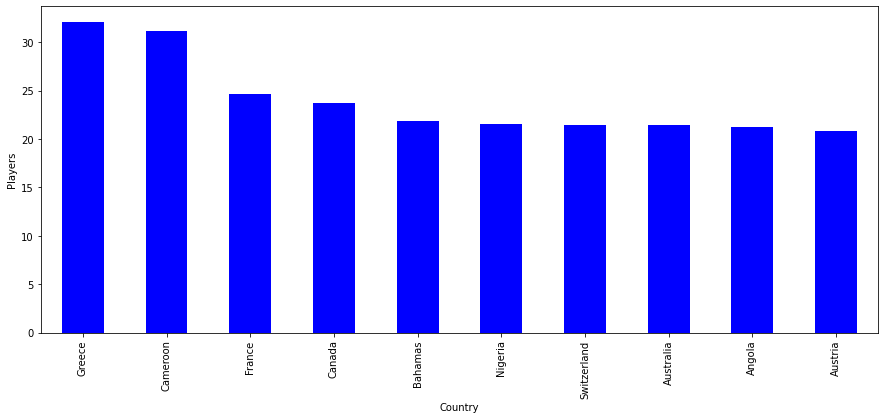

In [59]:
players_by_country_PER = players_by_country.loc[players_by_country['Country'] != 'US']

countries = []


for each, country in enumerate(players_by_country_PER['Country']):
    country_abb = players_by_country_PER['Country'].values[each]
    country_conv = pycountry.countries.lookup(country_abb)
    countries.append(country_conv.name)

players_by_country_PER['Country'] = countries
    
players_by_country_PER_filter = players_by_country_PER[['Country','PER']].groupby('Country').max().sort_values(by="PER", ascending = False)

players_by_country_PER_clean = players_by_country_PER_filter.dropna(subset=['PER']).head(10)

players_by_country_PER_clean.plot(kind="bar", legend=False, ylabel="Players", figsize=(15,4), color="blue")

print (f'Based on PER these are the top 10 countries with the peak performance players')

plt.show()

Based on PER these is the distribution of 10 countries with the peak performance players


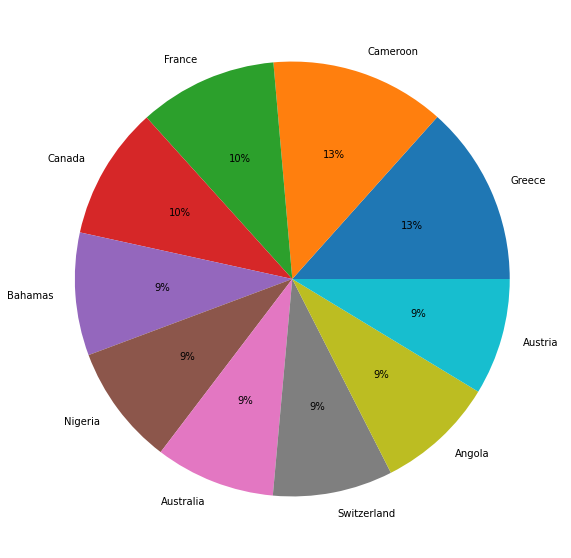

In [61]:
players_country_PER_pie_data = players_by_country.loc[players_by_country['Country'] != 'US']

players_by_country_PER_pie = players_country_PER_pie_data[["Country","PER"]].groupby("Country").max()

players_by_country_PER_pie_plot = players_by_country_PER_pie.sort_values(by=['PER'], ascending=False).head(10)


countries = players_by_country_PER_pie_plot.index.tolist()

for each, country in enumerate(countries):
    country_conv = pycountry.countries.lookup(country)
    countries[each] = country_conv.name


#x_axis = np.arange(len(timepoints_sex_summary_pypie))

#labels=["Female","Male"]

plt.figure(figsize=(15,10))
plt.pie(players_by_country_PER_pie_plot["PER"],autopct=('%1.0f%%'),labels=countries)


print (f'Based on PER these is the distribution of 10 countries with the peak performance players')

plt.show()

0.14052085742298906


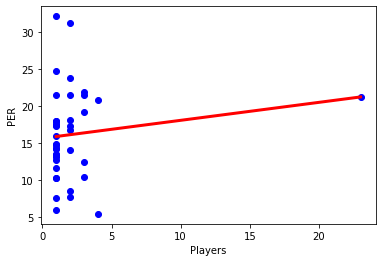

In [28]:
players_by_country_qty = players_by_country.loc[players_by_country['Country'] != 'US']

countries_data = players_by_country_qty['Country'].value_counts().index.tolist()
players = players_by_country_qty['Country'].value_counts().values.tolist()
PER_DF = players_by_country_qty[['Country','PER']].groupby('Country').max()
PER_lst = PER_DF['PER'].tolist()

countries = []

for each, country in enumerate(countries_data):
    country_conv = pycountry.countries.lookup(countries_data[each])
    countries.append(country_conv.name)

    countries_data_row = {'Country': countries ,'Players': players, 'PER': PER_lst}

player_countries_df = pd.DataFrame(countries_data_row).reset_index(drop=True)
player_countries_df.set_index('Country',inplace=True, drop=True)

print(player_countries_df["Players"].corr(player_countries_df["PER"]))

length = len(countries)

x = player_countries_df["Players"].values
y = player_countries_df["PER"].values

x = x.reshape(length, 1)
y = y.reshape(length, 1)


regr = linear_model.LinearRegression()
regr.fit(x, y)


plt.scatter(x, y,  color='blue')
plt.plot(x, regr.predict(x), color='red', linewidth=3)
plt.ylabel('PER')
plt.xlabel('Players')
plt.show()

   
# plt.show()


## College

There are 173 College/University where most NBA Players come from
The top 10  are shown here:


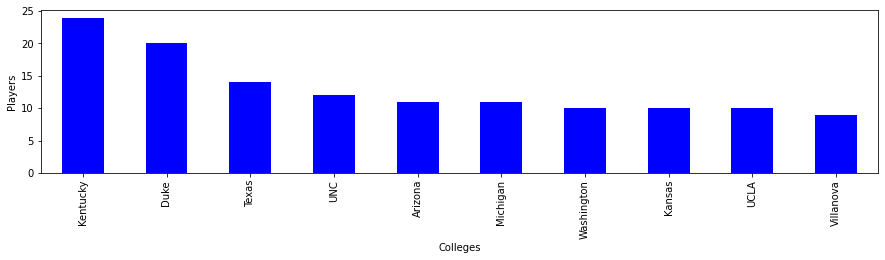

In [13]:
n = 10
colleges = players_by_college['Colleges'].value_counts()[:n].index.tolist()
players = players_by_college['Colleges'].value_counts()[:n].values.tolist()

college_data = {'Colleges': colleges ,'Players': players}

colleges_df = pd.DataFrame(college_data).reset_index(drop=True)
colleges_df.set_index('Colleges',inplace=True, drop=True)

players_by_college_analysis_bar = colleges_df

players_by_college_analysis_bar.plot(kind="bar", legend=False, ylabel="Players", figsize=(15,3), color="blue")



print(f'There are {players_by_college["Colleges"].nunique()} College/University where most NBA Players come from')
print(f'The top 10  are shown here:')


plt.show()

Based on PER these are the top 10 colleges with the peak performance players


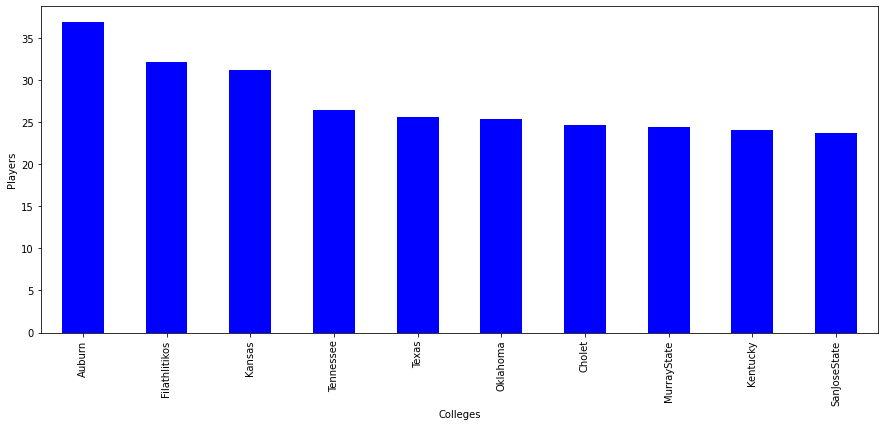

In [15]:
players_by_college_PER = players_by_college.copy()

players_by_college_PER_filter = players_by_college_PER[['Colleges','PER']].groupby('Colleges').max().sort_values(by="PER", ascending = False)

players_by_college_PER_clean = players_by_college_PER_filter.dropna(subset=['PER']).head(10)

players_by_college_PER_clean.plot(kind="bar", legend=False, ylabel="Players", figsize=(15,6), color="blue")

print (f'Based on PER these are the top 10 colleges with the peak performance players')

plt.show()

Based on PER these is the distribution of 10 colleges with the peak performance players


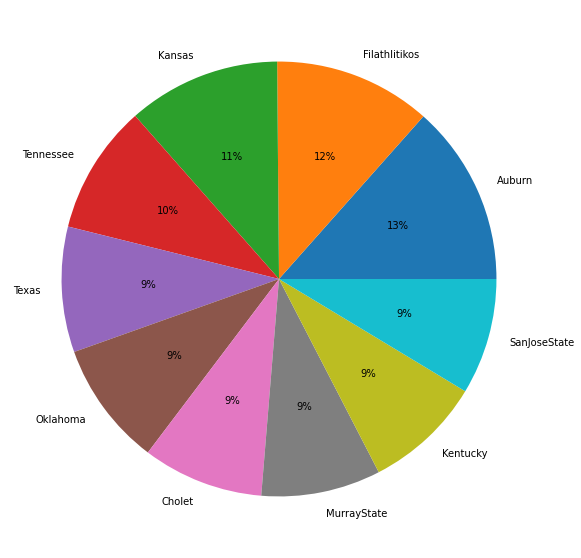

In [62]:
players_college_PER_pie_data = players_by_college.loc[players_by_college['Colleges'] != 'US']

players_by_college_PER_pie = players_college_PER_pie_data[["Colleges","PER"]].groupby("Colleges").max()

players_by_college_PER_pie_plot = players_by_college_PER_pie.sort_values(by=['PER'], ascending=False).head(10)

college = players_by_college_PER_pie_plot.index.tolist()

#x_axis = np.arange(len(timepoints_sex_summary_pypie))

#labels=["Female","Male"]

plt.figure(figsize=(15,10))
plt.pie(players_by_college_PER_pie_plot["PER"],autopct=('%1.0f%%'),labels=college)


print (f'Based on PER these is the distribution of 10 colleges with the peak performance players')

plt.show()

## US City

There are 227 cities in the US where most NBA Players come from
The top 10  are shown here:


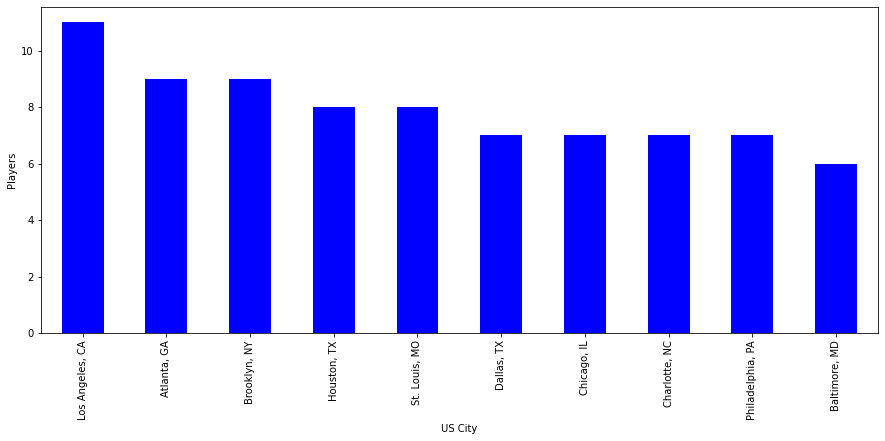

In [5]:
players_by_uscity_clean = players_by_uscity.copy()

n = 10
uscity = players_by_uscity_clean['Player US Full City'].value_counts()[:n].index.tolist()
players = players_by_uscity_clean['Player US Full City'].value_counts()[:n].values.tolist()

uscity_data = {'US City': uscity ,'Players': players}

uscity_df = pd.DataFrame(uscity_data).reset_index(drop=True)
uscity_df.set_index('US City',inplace=True, drop=True)


players_by_uscity_analysis_bar = uscity_df

players_by_uscity_analysis_bar.plot(kind="bar", legend=False, ylabel="Players", figsize=(15,6), color="blue")

uscity_df.to_csv(f'{path}players_top10_2022_uscity.csv', encoding='utf-8-sig')

print(f'There are {players_by_uscity_clean["Player US Full City"].nunique()} cities in the US where most NBA Players come from')
print(f'The top 10  are shown here:')

plt.show()

Based on PER these are the top 10 US cities with the peak performance players


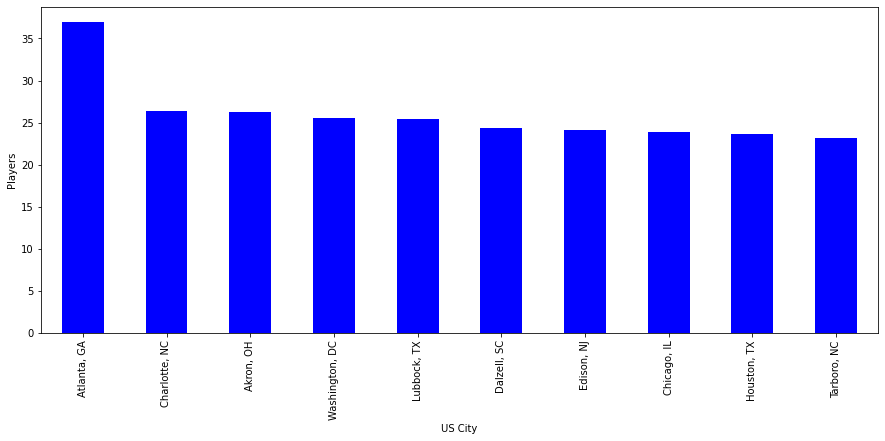

In [18]:
players_by_uscity_PER = players_by_uscity.copy()

players_by_uscity_PER_filter = players_by_uscity_PER[['Player US Full City','PER']].groupby('Player US Full City').max().sort_values(by="PER", ascending = False)

players_by_uscity_PER_clean = players_by_uscity_PER_filter.dropna(subset=['PER']).head(10)

players_by_uscity_PER_clean.plot(kind="bar", legend=False, ylabel="Players", xlabel="US City", figsize=(15,6), color="blue")

print (f'Based on PER these are the top 10 US cities with the peak performance players')

plt.show()

Based on PER these is the distribution of 10 US cities with the peak performance players


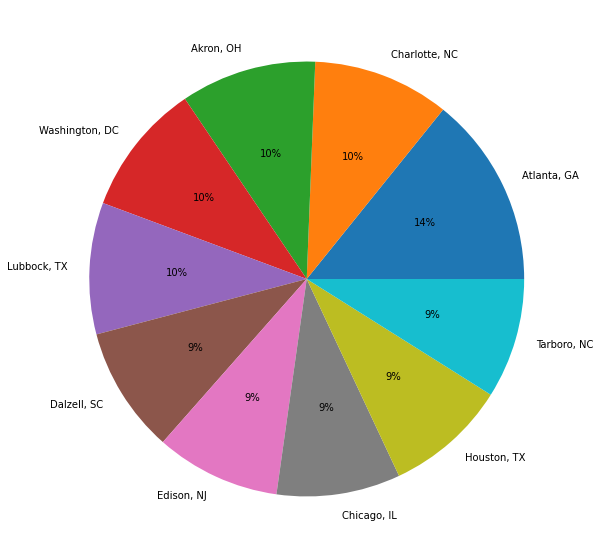

In [64]:
players_uscity_PER_pie_data = players_by_uscity.loc[players_by_uscity['Player US Full City'] != 'US']

players_by_uscity_PER_pie = players_uscity_PER_pie_data[["Player US Full City","PER"]].groupby("Player US Full City").max()

players_by_uscity_PER_pie_plot = players_by_uscity_PER_pie.sort_values(by=['PER'], ascending=False).head(10)

uscity = players_by_uscity_PER_pie_plot.index.tolist()

#x_axis = np.arange(len(timepoints_sex_summary_pypie))

#labels=["Female","Male"]

plt.figure(figsize=(15,10))
plt.pie(players_by_uscity_PER_pie_plot["PER"],autopct=('%1.0f%%'),labels=uscity)


print (f'Based on PER these is the distribution of 10 US cities with the peak performance players')

plt.show()

## Int City

There are 69 cities where NBA player come from around the world
The top 10  are shown here:


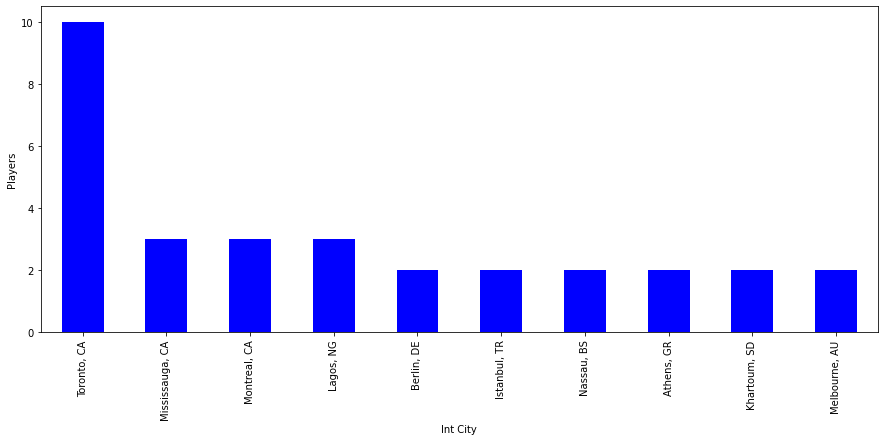

In [6]:
players_by_intcity_clean = players_by_intcity.copy()

n = 10
intcity = players_by_intcity_clean['Player Int Full City'].value_counts()[:n].index.tolist()
players = players_by_intcity_clean['Player Int Full City'].value_counts()[:n].values.tolist()

intcity_data = {'Int City': intcity ,'Players': players}

intcity_df = pd.DataFrame(intcity_data).reset_index(drop=True)
intcity_df.set_index('Int City',inplace=True, drop=True)

players_by_intcity_analysis_bar = intcity_df

players_by_intcity_analysis_bar.plot(kind="bar", legend=False, ylabel="Players", figsize=(15,6), color="blue")

intcity_df.to_csv(f'{path}players_top10_2022_intcity.csv', encoding='utf-8-sig')

print(f'There are {players_by_intcity_clean["Player Int Full City"].nunique()} cities where NBA player come from around the world')
print(f'The top 10  are shown here:')

plt.show()

Based on PER these are the top 10 International cities with the peak performance players


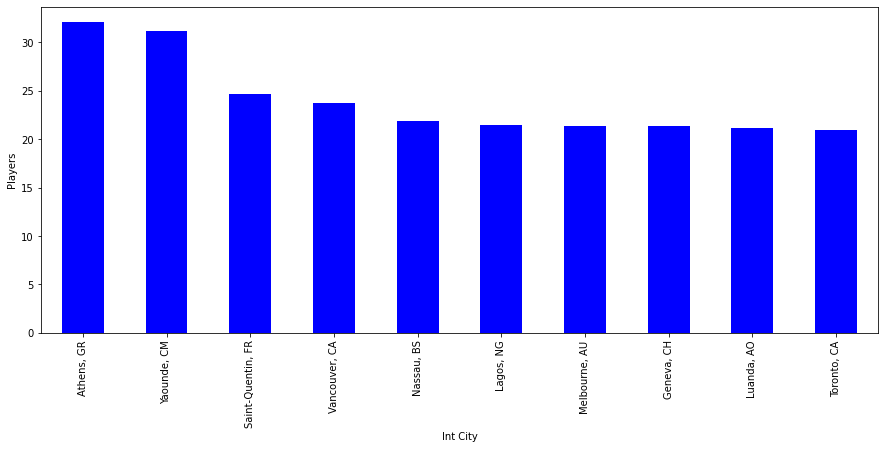

In [19]:
players_by_intcity_PER = players_by_intcity.copy()

players_by_intcity_PER_filter = players_by_intcity_PER[['Player Int Full City','PER']].groupby('Player Int Full City').max().sort_values(by="PER", ascending = False)

players_by_intcity_PER_clean = players_by_intcity_PER_filter.dropna(subset=['PER']).head(10)

players_by_intcity_PER_clean.plot(kind="bar", legend=False, ylabel="Players", xlabel="Int City", figsize=(15,6), color="blue")

print (f'Based on PER these are the top 10 International cities with the peak performance players')

plt.show()

Based on PER these is the distribution of 10 International cities with the peak performance players


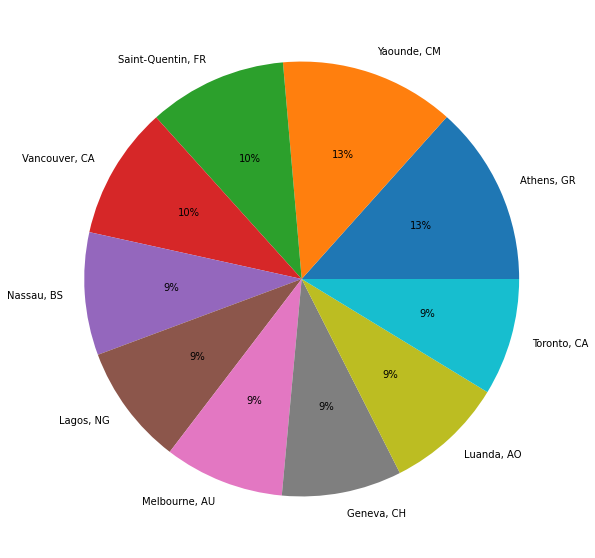

In [65]:
players_intcity_PER_pie_data = players_by_intcity.loc[players_by_intcity['Player Int Full City'] != 'US']

players_by_intcity_PER_pie = players_intcity_PER_pie_data[["Player Int Full City","PER"]].groupby("Player Int Full City").max()

players_by_intcity_PER_pie_plot = players_by_intcity_PER_pie.sort_values(by=['PER'], ascending=False).head(10)

intcity = players_by_intcity_PER_pie_plot.index.tolist()

#x_axis = np.arange(len(timepoints_sex_summary_pypie))

#labels=["Female","Male"]

plt.figure(figsize=(15,10))
plt.pie(players_by_intcity_PER_pie_plot["PER"],autopct=('%1.0f%%'),labels=intcity)


print (f'Based on PER these is the distribution of 10 International cities with the peak performance players')

plt.show()